In [102]:
from envirocar import TrackAPI, DownloadClient, BboxSelector, ECConfig, Preprocessing, DouglasPeuckerGeneralizer, MinDistanceGeneralizer, MaxDistanceGeneralizer

In [2]:
config = ECConfig()
track_api = TrackAPI(api_client=DownloadClient(config=config))
preprocessing = Preprocessing()

Initializing pre-processing class


In [3]:
bbox = BboxSelector([
    7.554130554199218, # min_x
    51.95590322041212, # min_y
    7.590351104736328, # max_x
    51.97874790276371  # max_y
])

# issue a query
track_df = track_api.get_tracks(bbox=bbox, num_results=2) # requesting tracks inside the bbox

In [4]:
single_track_id = track_df['track.id'].unique()[1]
single_track = track_df[track_df['track.id'] == single_track_id]
single_track

,id,time,geometry,Calculated MAF.value,Calculated MAF.unit,Throttle Position.value,Throttle Position.unit,CO2.value,CO2.unit,Rpm.value,...,sensor.id,sensor.fuelType,sensor.constructionYear,sensor.manufacturer,GPS HDOP.value,GPS HDOP.unit,GPS PDOP.value,GPS PDOP.unit,GPS VDOP.value,GPS VDOP.unit
0,5de9d7a03bdb691868e76542,2019-11-29T12:24:48,POINT (7.60302 51.93549),3.527790,g/s,13.000000,%,2.725207,kg/h,763.163669,...,559e22c2e4b07207d8977998,gasoline,2004,Mercedes Benz,0.800000,precision,1.982755,precision,1.882755,precision
1,5de9d7a03bdb691868e76544,2019-11-29T12:24:53,POINT (7.60279 51.93574),7.134063,g/s,15.000000,%,5.511042,kg/h,1701.677369,...,559e22c2e4b07207d8977998,gasoline,2004,Mercedes Benz,0.800000,precision,1.800000,precision,1.500607,precision
2,5de9d7a03bdb691868e76545,2019-11-29T12:24:58,POINT (7.60318 51.93579),7.130710,g/s,16.000000,%,5.508452,kg/h,1361.423041,...,559e22c2e4b07207d8977998,gasoline,2004,Mercedes Benz,0.900000,precision,1.870909,precision,1.580606,precision
3,5de9d7a03bdb691868e76546,2019-11-29T12:25:03,POINT (7.60354 51.93574),26.263393,g/s,30.999999,%,20.288390,kg/h,1951.543919,...,559e22c2e4b07207d8977998,gasoline,2004,Mercedes Benz,0.882600,precision,1.930400,precision,1.730400,precision
4,5de9d7a03bdb691868e76547,2019-11-29T12:25:08,POINT (7.60403 51.93611),3.472391,g/s,13.000000,%,2.682411,kg/h,792.443191,...,559e22c2e4b07207d8977998,gasoline,2004,Mercedes Benz,0.800000,precision,1.700000,precision,1.500000,precision
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,5de9d7a03bdb691868e765c8,2019-11-29T12:36:05,POINT (7.58749 51.96556),3.331351,g/s,13.000000,%,2.573459,kg/h,757.169811,...,559e22c2e4b07207d8977998,gasoline,2004,Mercedes Benz,0.855909,precision,1.844091,precision,1.644091,precision
134,5de9d7a03bdb691868e765c9,2019-11-29T12:36:10,POINT (7.58695 51.96555),3.434403,g/s,13.000000,%,2.653065,kg/h,754.329693,...,559e22c2e4b07207d8977998,gasoline,2004,Mercedes Benz,1.100000,precision,1.869131,precision,1.569131,precision
135,5de9d7a03bdb691868e765ca,2019-11-29T12:36:15,POINT (7.58688 51.96547),3.256539,g/s,13.000000,%,2.515667,kg/h,761.104972,...,559e22c2e4b07207d8977998,gasoline,2004,Mercedes Benz,1.075151,precision,1.949698,precision,1.674547,precision
136,5de9d7a03bdb691868e765cb,2019-11-29T12:36:21,POINT (7.58688 51.96544),3.202641,g/s,13.000000,%,2.474030,kg/h,748.507959,...,559e22c2e4b07207d8977998,gasoline,2004,Mercedes Benz,0.812792,precision,1.651168,precision,1.463959,precision


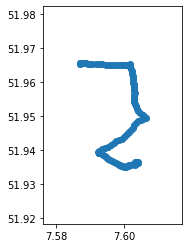

In [5]:
single_track.plot()

We can also create a trajectory collection if we have more multiple trajectories, using the preprocessing class. 
Generalization functions can take both the trajectory and the trajectory collection to generalze the tracjectories.

In [6]:
tracksCollection = preprocessing.trajectoryCollection(track_df, 100)
tracksCollection

Finished creating 2 trajectories


In [8]:
track = tracksCollection.get_trajectory(single_track_id)
str(track)

'Trajectory 5de9d7a03bdb691868e76540 (2019-11-29 12:24:48 to 2019-11-29 12:36:26) | Size: 138 | Length: 5599.9m\nBounds: (7.586873513467167, 51.93497064459818, 7.606243337376825, 51.96555515316689)\nLINESTRING (7.603024148757198 51.93548608427817, 7.602793289474294 51.93574292981515, 7.603176724093'

## Douglas Peucker Generalizer

The Ramer-Douglas–Peucker algorithm is an algorithm for reducing the number of points in a curve or in this case a trajectory that is approximated by a series of points. It does so by "thinking" of a line between the first and last point in a set of points that form the trajectory. It checks which point in between is farthest away from this line. If the point (and as follows, all other in-between points) is closer than a given distance 'tolerance', it removes all these in-between points. 

Here we set the tolerance value of `0.001` meters to smoothen the trajectory but still preservering most information.
The second argument of the generalize function takes a list of column names whoes values we want to shift to the neighboring rows in case a row is removed becuase of generalization. At the end, the sum of those columns will remain the same.

In [12]:
generalizedTracks = DouglasPeuckerGeneralizer(tracksCollection).generalize(0.001, ['CO2.value', 'Speed.value'])
generalizedTracks

In [13]:
# get our single track trajectory from generalized trajectories
generalizedTrack = generalizedTracks.get_trajectory(single_track_id)
str(generalizedTrack)

'Trajectory 5de9d7a03bdb691868e76540 (2019-11-29 12:24:48 to 2019-11-29 12:36:26) | Size: 9 | Length: 5188.2m\nBounds: (7.586873513467167, 51.93548608427817, 7.606071745059019, 51.965332360706796)\nLINESTRING (7.603024148757198 51.93548608427817, 7.603189109407566 51.93634398175759, 7.598117393829'

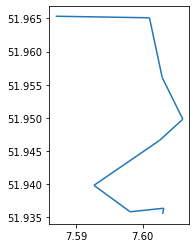

In [18]:
generalizedTrack.plot()

Generalization adds three more columns to the original dataframe. `Generlized` a boolean that we use to determine if the track is generalized or not. `Generalization.Method`, string value representing the method name used for generlaization. `Generalization.RowsRemovedCount` tells us the number of rows which are removed because of the generalization.

In [15]:
generalizedTrack.df['Generalized']

t
2019-11-29 12:24:48    True
2019-11-29 12:25:28    True
2019-11-29 12:26:45    True
2019-11-29 12:28:47    True
2019-11-29 12:29:58    True
2019-11-29 12:31:30    True
2019-11-29 12:32:46    True
2019-11-29 12:34:13    True
2019-11-29 12:36:26    True
Name: Generalized, dtype: bool

In [16]:
generalizedTrack.df['Generalization.Method']

t
2019-11-29 12:24:48    Douglas-Peucker
2019-11-29 12:25:28    Douglas-Peucker
2019-11-29 12:26:45    Douglas-Peucker
2019-11-29 12:28:47    Douglas-Peucker
2019-11-29 12:29:58    Douglas-Peucker
2019-11-29 12:31:30    Douglas-Peucker
2019-11-29 12:32:46    Douglas-Peucker
2019-11-29 12:34:13    Douglas-Peucker
2019-11-29 12:36:26    Douglas-Peucker
Name: Generalization.Method, dtype: object

In [17]:
generalizedTrack.df['Generalization.RemovedRowsCount']

t
2019-11-29 12:24:48    97
2019-11-29 12:25:28    97
2019-11-29 12:26:45    97
2019-11-29 12:28:47    97
2019-11-29 12:29:58    97
2019-11-29 12:31:30    97
2019-11-29 12:32:46    97
2019-11-29 12:34:13    97
2019-11-29 12:36:26    97
Name: Generalization.RemovedRowsCount, dtype: int64

Lets see whether the sum of the columns was preserved, before and after the generalization.

In [19]:
track.df['CO2.value'].sum()

910.6903160793698

In [21]:
generalizedTrack.df['CO2.value'].sum()

910.6903160793698

In [22]:
track.df['Speed.value'].sum()

4036.5750941690058

In [23]:
generalizedTrack.df['Speed.value'].sum()

4036.5750941690058

## Min-Time Delta Generalizer

Min-Time delta generliazer takes a time delta as a tolerance value and removes all points within consecutive two points, that are less than that time delta apart.

In [ ]:
generalizedTracks = (tracksCollection).generalize(0.001, ['CO2.value', 'Speed.value'])
generalizedTracksgeneralizedTracks = DouglasPeuckerGeneralizer(tracksCollection).generalize(0.001, ['CO2.value', 'Speed.value'])
generalizedTracks

## Min-Distance Generalizer

Min-distance generalizer ensures that the consecutive points are atleast a cerain distance apart.

In [97]:
generalizedTracksMinDistance = MinDistanceGeneralizer(tracksCollection).generalize(1.0, ['CO2.value', 'Speed.value'])
generalizedTracksMinDistance

AttributeError: 'Trajectory' object has no attribute 'get_geom_column_name'